In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import ast
from shapely.geometry import Point, Polygon
import geopandas as gpd



In [2]:
#DEFINING THE DATA
inspector = pickle.load(open('inspector.p', 'rb'))
health = pd.read_csv('health_inspector_combined.csv')
merged = pd.read_csv('merged.csv')

In [3]:
merged['num_v'] = merged['violations'].apply(lambda x: len(ast.literal_eval(x)))


#Dropping inspectors that have not copmpleted AT LEAST 20 inspections
vdf = pd.DataFrame(merged['inspector'].value_counts())
vdf['check'] = vdf['inspector'] > 20
over_20 = list(vdf.loc[vdf['check'], :].reset_index()['index'])

merged['check'] = merged['inspector'].isin(over_20)
new_df = merged.loc[merged['check'], :]
new_df = new_df.drop(columns = ['check', 'Unnamed: 0'])
#new_df.head()
inspectors_list = pd.DataFrame(new_df.inspector.unique())
#merged[merged['inspector'].isin(inspectors_list)]

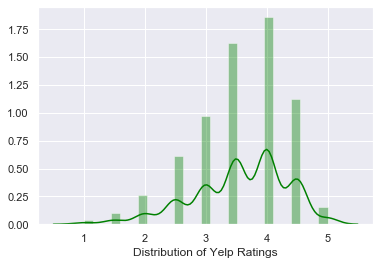

In [4]:
#yelp rating distribution
merged['Distribution of Yelp Ratings'] = merged['rating']
sns.set()


sns.distplot(merged['Distribution of Yelp Ratings'], color = 'green')

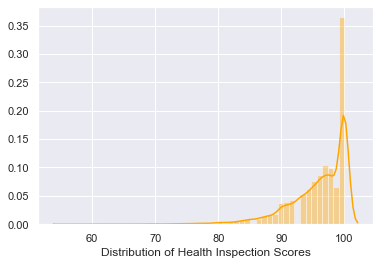

In [370]:
#inspection score distribution
#health['Distribution of Health Inspection Scores'] = health['TOTAL SCORE']
sns.distplot(health['Distribution of Health Inspection Scores'], color = 'orange')
#health
#health['Distribution of Average Violations'] = health['num_v']
#sns.distplot(health['Distribution of Average Violations'], color = 'blue')

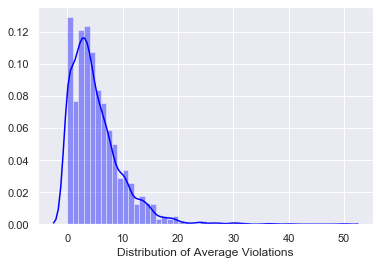

In [369]:
#mean violation distribution
#sns.distplot(merged['Distribution of Health Inspection Scores'], color = 'orange')
merged['Distribution of Average Violations'] = merged['num_v']
sns.distplot(merged['Distribution of Average Violations'], color = 'blue')

In [8]:
#sns.barplot(data = merged, y = 'total_score', x = 'num_v')
#plt.pie([10, 20 ,30])
#len(merged[(merged['total_score'] < 100) & (merged['total_score'] > 89)])

#sized = [len(merged[merged['total_score'] == 100]), len(merged[(merged['total_score'] < 100) & (merged['total_score'] > 94)]), \
         len(merged[(merged['total_score'] > 89) & (merged['total_score'] < 95)]), len(merged[merged > ])]
#plt.pie(sized)

IndentationError: unexpected indent (<ipython-input-8-24bc1125302d>, line 6)

In [9]:
#merged[merged['inspector'].isin(inspectors_list)]
merged = merged[merged['inspector'].isin(inspectors_list[0])]

In [255]:
#street_map
#geo_df
#geo_df['score'] = geo_df['Distribution of Yelp Ratings']
#geo_df['total_score']
merged['AB'] = merged['total_score'].apply(lambda x: "Above Average" if \
                                           x >= merged['total_score'].mean() else 'Below Average')
#health['AB']


In [256]:
street_map = gpd.read_file("tl_2013_48029_edges")
crs = {'init': 'epsg:4326' }
geometry = [Point(xy) for xy in zip(merged['longitude'], merged['latitude'])]
geo_df = gpd.GeoDataFrame(merged, crs=crs, geometry = geometry)
#geo_df['sector']
#geo_df[geo_df.district == 'A'].plot(ax=ax, markersize = 20, color = 'blue', marker = 'o', label= 'District A')

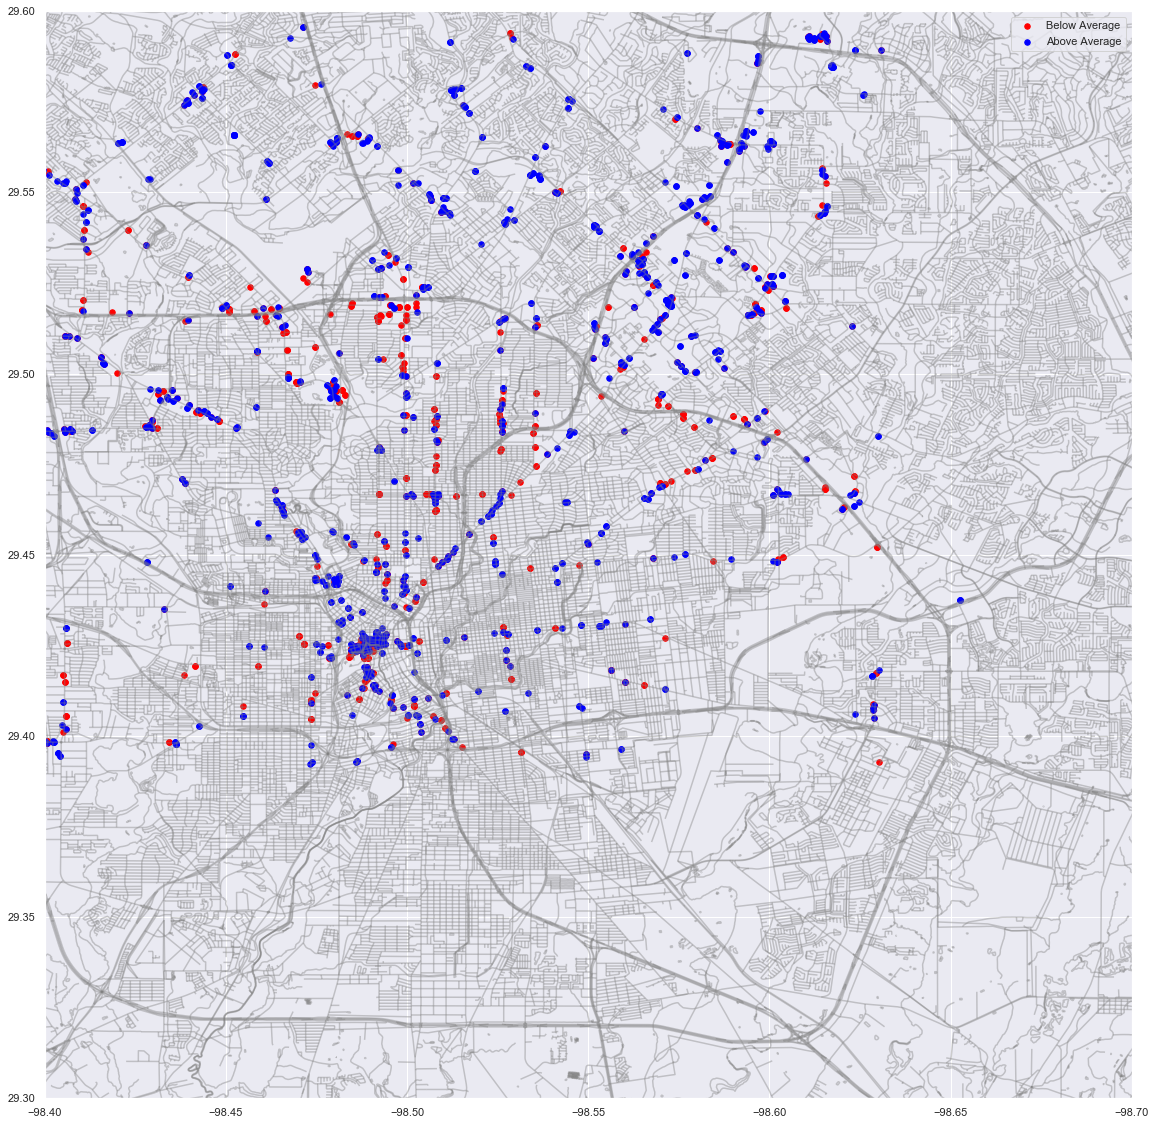

In [351]:
import random
#sns.set_palette("RdBu", 2)
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
#colors = ['red', 'blue', 'green', 'orange', 'pink', 'cyan', '']
#print(health['AB'])


colors = ['red', 'blue']
interval = 0
for i in health['AB'].unique():
    #print(geo_df[geo_df.total_score == i])
    #print('col')
    #color = random.choice(colors)
    geo_df[geo_df.AB == i].plot(ax=ax, markersize = 30, marker = 'o', label= i, color = colors[interval])
    interval += 1

#sns.set_palette("cubehelix", 10)

#for i in list(merged['inspector'].unique()):
 #   print(i)
  #  geo_df[geo_df.inspector == i].plot(ax=ax, markersize = 10, marker = 'o', label= i, color = random.choice(colors))
    
        
ax.set_ylim([29.3, 29.6])
ax.set_xlim([-98.4, -98.7])
plt.legend()

In [76]:
c = """silver	black	turquoise	azure	teal	cyan	green	chartreuse
 	maroon	 	 	 	 	 	 	 	 	 	 	 	 	 	 
olive	yellow	gold	orange	brown	pink	indigo
 	 	 	 	 	 	 	 	 	 	 	 	 	 	 	 
beige	violet	plum
"""
import re
colors = c.split('	') 
colors = [re.sub('\n', '', c).strip() for c in [c for c in colors if c != ' ']]
#colors.remove(' ')
print(len(colors))

21


In [14]:
merged

,Unnamed: 0,inspection_date,inspector,number_of_violations,violations,zip_code,house_numbers,categories,transactions,distance,...,clean_address_x,clean_address_y,address_distance,name_distance,num_v,check,Distribution of Yelp Ratings,Distribution of Health Inspection Scores,Distribution of Average Violations,geometry
0,0,2019-01-02,Cicily Martinez,3,"['22', '29', '45']",78212,2524,"['Italian', 'Desserts', 'Seafood']",[],4950.353662,...,main,n maine,3,0,3,True,3.5,97,3,POINT (-98.49378 29.45373)
1,1,2019-03-06,RYAN DAVIS,1,['31'],78230,14439,"['French', 'Asian Fusion', 'Tapas/Small Plates']",[],9312.955170,...,military hwy,nw military hwy,3,2,1,True,4.0,98,1,POINT (-98.54454 29.57333)
2,2,2019-07-10,Jacob Johanson,1,['19'],78212,825,['International Grocery'],[],3151.827872,...,hildebrand,w hildebrande,3,0,1,True,4.5,97,1,POINT (-98.50724 29.46669)
3,3,2019-11-04,Cicily Martinez,3,"['10', '15', '40']",78201,914,['Mexican'],['delivery'],3194.340357,...,hildebrand,w hildebrande,3,0,3,True,4.0,93,3,POINT (-98.50862 29.46616)
4,4,2019-03-14,RYAN DAVIS,0,[],78230,13151,['Barbeque'],['delivery'],7935.733616,...,military hwy,nw military hwy,3,6,0,True,2.5,100,0,POINT (-98.53795 29.56285)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2404,2019-06-11,Nathan Balfour,1,['30'],78249,6563,"['Shaved Ice', 'Mexican', 'Ice Cream & Frozen ...","['pickup', 'delivery']",11794.267993,...,babcock,babcock,0,1,1,True,4.5,98,1,POINT (-98.61449 29.55502)
2405,2405,2019-06-11,Nathan Balfour,2,"['34', '39']",78256,15606,['Mexican'],[],14923.420659,...,chase hill,chase hill,0,0,2,True,2.5,98,2,POINT (-98.62355 29.58929)
2406,2406,2019-06-11,Jeffrey Carrizales,3,"['2', '3', '25']",78229,9102,"['Sushi Bars', 'Japanese', 'Mexican']","['delivery', 'pickup']",6168.332679,...,wurzbach,wurzbach,0,4,3,True,4.5,100,3,POINT (-98.56612 29.52665)
2407,2407,2019-06-11,Jeffrey Carrizales,3,"['2', '3', '25']",78229,9102,"['Sushi Bars', 'Japanese', 'Mexican']","['pickup', 'delivery']",6168.332679,...,wurzbach,wurzbach,0,4,3,True,4.5,100,3,POINT (-98.56612 29.52665)


In [ ]:
sns.

In [15]:
a = list(geo_df['total_score'].unique())


In [16]:
a.sort()

In [17]:
a

[56,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [35]:
#gb = health.groupby('Inspector')['TOTAL SCORE'].value_counts()
health['perfecto'] = health['TOTAL SCORE'].apply(lambda x: x == 100)
#health['perfecto'].value_counts()
health.groupby('Inspector')['perfecto'].value_counts()
#gb = pd.DataFrame(gb).reset_index()
#health['Inspector'].nunique()

Inspector         perfecto
Adan Zamora       False       204
                  True        178
Amanda Cantu      False       262
                  True        107
Bamba Njie        False       299
                             ... 
Victoria Paredes  True        135
William Emminger  False       275
                  True         99
William Hudson    False       222
                  True        161
Name: perfecto, Length: 74, dtype: int64

In [ ]:
#sns.barplot(data = gb, x = 'Inspector',y = 'TOTAL SCORE')
#sns.barplot(data = gb, x = 'Inspector',y = 'TOTAL SCORE')



In [ ]:
#health[health['Inspector'] == 'Victoria Paredes']['TOTAL SCORE']

In [62]:
#health['perfecto'].value_counts(normalize=True)
#health.groupby('Inspector')['perfecto'].value_counts()

sus = {'Inspector' : [], 'perfect_scores' : [], 'visits' : []}
for h in health['Inspector'].unique():
    print('<<<<<|>>>>>')
    print(h)
    sus['Inspector'].append(h)
    sus['visits'].append(len(health[health['Inspector'] == h]))
    scorem = health[health['Inspector'] == h]['perfecto'].value_counts(normalize=True)[True]
    print(scorem)
    sus['perfect_scores'].append(scorem)
print('-------------------------------')
print(sum(sus['perfect_scores']) / len(sus['perfect_scores']))

<<<<<|>>>>>
Sumner Bumgardner
0.23180592991913745
<<<<<|>>>>>
Jeffrey Carrizales
0.3699788583509514
<<<<<|>>>>>
Cicily Martinez
0.3136645962732919
<<<<<|>>>>>
Kassandra Aguilar
0.3681710213776722
<<<<<|>>>>>
Lauren Schumacher
0.10734463276836158
<<<<<|>>>>>
William Emminger
0.2647058823529412
<<<<<|>>>>>
Sean Gilbert
0.32234432234432236
<<<<<|>>>>>
Mario Cavazos
0.24688279301745636
<<<<<|>>>>>
Monica Caballero
0.26956521739130435
<<<<<|>>>>>
Debra Hernandez
0.4838709677419355
<<<<<|>>>>>
Jacob Johanson
0.21823204419889503
<<<<<|>>>>>
Bernard Capdeboscq
0.23931623931623933
<<<<<|>>>>>
Rebecca Vera
0.15083798882681565
<<<<<|>>>>>
Fermin Garza
0.41728395061728396
<<<<<|>>>>>
John Payelle
0.25949367088607594
<<<<<|>>>>>
Nathan Balfour
0.4754521963824289
<<<<<|>>>>>
Bamba Njie
0.1830601092896175
<<<<<|>>>>>
Daisy Zamora
0.26436781609195403
<<<<<|>>>>>
Erica Llanas
0.32882882882882886
<<<<<|>>>>>
Daniel Guzman
0.13149847094801223
<<<<<|>>>>>
Valerie Suarez
0.19338422391857507
<<<<<|>>>>>
Ada

In [114]:
import statistics

print(statistics.median(sus['perfect_scores']))
print(statistics.mean(sus['perfect_scores']))

0.3136645962732919
0.31683404473037047


In [226]:
#sus = pd.DataFrame(sus)
#s = sus['perfect_scores'].mean() - (sus['perfect_scores'].std() * 1)
#print(sus['perfect_scores'].mean() - (sus['perfect_scores'].std() * 2))
#print(sus['perfect_scores'].std())
#sus[(sus['perfect_scores'] > s)]
#mf = """MMMFFMMMFFMMFMMMMFFMFMMFFMFFFFFMFMFMM"""
#sus['ForM'] = list(mf)
#sus.drop(columns = ['MorF'], inplace = True)
#print(len(mf))
#print(len(sus))
#print(sus)
sus['mean_v'] = pd.DataFrame(health.groupby('Inspector')['TOTAL SCORE'].mean()).reset_index()['TOTAL SCORE']
#sus.drop(columns = ['m_score'], inplace = True)
#sus.groupby('ForM')
sus

,Inspector,perfect_scores,visits,ForM,mean_v
0,Sumner Bumgardner,0.231806,371,M,97.039267
1,Jeffrey Carrizales,0.369979,473,M,95.766938
2,Cicily Martinez,0.313665,322,M,95.095628
3,Kassandra Aguilar,0.368171,421,F,95.571856
4,Lauren Schumacher,0.107345,531,F,95.241453
5,William Emminger,0.264706,374,M,94.863354
6,Sean Gilbert,0.322344,546,M,96.752874
7,Mario Cavazos,0.246883,401,M,96.351682
8,Monica Caballero,0.269565,345,F,96.589577
9,Debra Hernandez,0.483871,310,F,96.754839


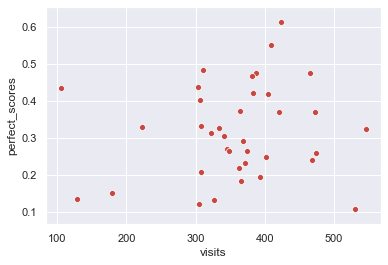

In [166]:
#NO STATISTICAL CORROLATION BETWEEN NUMBER OF VISITS AND PERFECT HEALTH SCORES
sns.scatterplot(data = sus, x = 'visits', y = 'perfect_scores')

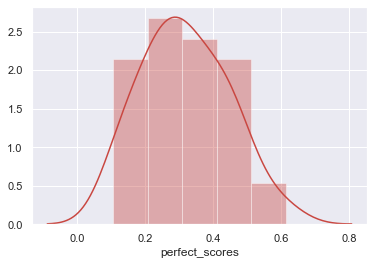

In [164]:
#DIST OF PERFECT SCORES
sns.distplot(sus['perfect_scores'])

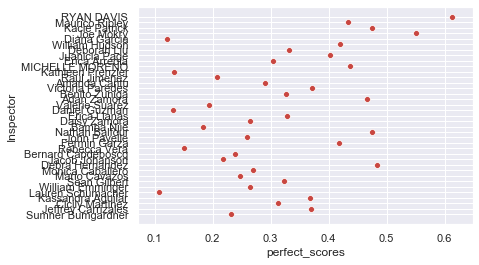

In [155]:
sns.scatterplot(x = sus['perfect_scores'], y = sus['Inspector'])

In [289]:
#health['perfecto'].value_counts()
health['almost_perfecto'] = health['TOTAL SCORE'].apply(lambda x: x > 94)
#health['almost_perfecto'].value_counts()



([<matplotlib.patches.Wedge at 0x1a2475d438>,
 [Text(-0.5863696430011737, 0.930682890015002, 'Imperfect Health Scores'),
  Text(0.6396758791247456, -1.015290485361694, 'Perfect Health Scores')],
 [Text(-0.3198379870915492, 0.5076452127354556, '67.9%'),
  Text(0.37314426282276825, -0.5922527831276548, '32.1%')])

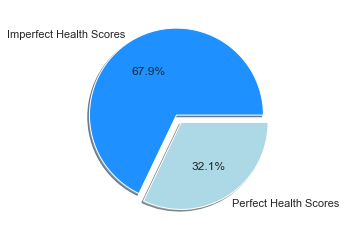

In [148]:
#health.loc[health['perfecto']][['TOTAL SCORE', 'perfecto']]
#plt.pie([9003, 4257], colors = ['dodgerblue', 'lightblue'], explode = (0, 0.1), autopct='%1.1f%%', \
       #shadow=True, labels = ['Imperfect Health Scores', 'Perfect Health Scores'])

In [175]:
yy = [len(health[health['TOTAL SCORE'] == 100]), len(health[health['TOTAL SCORE'] > 98]), \
      len(health[health['TOTAL SCORE'] > 97]), len(health[health['TOTAL SCORE'] > 96])]
print(yy)

[4257, 5021, 6181, 7391]


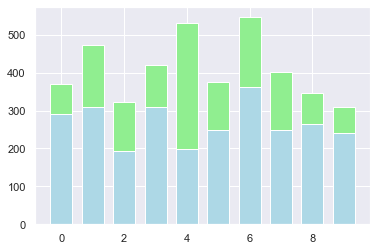

In [450]:

#colors = ['darkgreen', 'green','mediumseagreen','g']

#for i in range(len(yy)):


for i in range(10):#len(health['Inspector'].unique())):
    ins = health['Inspector'].unique()[i]
    new_df = health[health['Inspector'] == ins]
    try:
        bar = [len(new_df), len(new_df.loc[new_df['almost_perfecto']])]
        plt.bar(i, bar, edgecolor='white', width=.7, color = ['lightgreen','lightblue'], label = 'an_inspector')
    except:
        print('!!')
        pass
#plt.xticks(['an_inspector' for i in range(10)])
#plt.legend()
plt.show()

In [280]:
#health['perfecto']
sns.barplot(data)

0        False
1        False
2        False
3        False
4        False
         ...  
13255    False
13256     True
13257     True
13258    False
13259    False
Name: perfecto, Length: 13260, dtype: bool

In [240]:
#health.groupby('Inspector')['SECTOR']
#for h in health['Inspector']:
    #print('<<<<<<<<<<|>>>>>>>>>>')
    #print(health[health['Inspector'] == h]['SECTOR'].value_counts())

    

#health.groupby('ESTABLISHMENT ADDRESS')['Inspector'].value_counts()
health[health['ESTABLISHMENT ADDRESS'] == 'ATTN BEST WESTERN INN SAN ANTONIO 8669 IH 10 E SAN ANTONIO, TX 78109-0']

,Unnamed: 0,Address,DISTRICT,ESTABLISHMENT ADDRESS,ESTABLISHMENT NAME,INSPECTION DATE,Inspector,LINK,SECTOR,TOTAL SCORE,Violations,num_v,perfecto,almost_perfecto
1127,1127,12828 US 281 N,C,ATTN BEST WESTERN INN SAN ANTONIO 8669 IH 10 E...,BEST WESTERN SAN ANTONIO EAST INN &,2019-02-06,Benito Zuniga,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,21,97,['7'],1,False,False
6957,5773,8669 IH 10 E,C,ATTN BEST WESTERN INN SAN ANTONIO 8669 IH 10 E...,BEST WESTERN SAN ANTONIO EAST INN &,2019-07-12,Amanda Cantu,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,21,100,"['21', '22', '30']",3,True,True


In [237]:
health

,Unnamed: 0,Address,DISTRICT,ESTABLISHMENT ADDRESS,ESTABLISHMENT NAME,INSPECTION DATE,Inspector,LINK,SECTOR,TOTAL SCORE,Violations,num_v,perfecto,almost_perfecto
0,0,107 9TH ST,C,"107 9TH ST San Antonio, TX 782150",BOURBON STREET SEAFOOD KITCHEN,2019-01-02,Sumner Bumgardner,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,19,91,"['10', '14', '21', '28', '29', '36']",6,False,False
1,1,3703 COLONY DR,A,"3703 COLONY DR San Antonio, TX 78230",BURMESE FOODS,2019-01-02,Jeffrey Carrizales,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,7,97,['7'],1,False,False
2,2,2524 MAIN AV N,D,"2524 MAIN AV N San Antonio, TX 782123451",CAPPARELLIS ON MAIN,2019-01-02,Cicily Martinez,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,35,97,"['22', '29', '45']",3,False,False
3,3,600 SANTA ROSA S,C,"600 SANTA ROSA S San Antonio, TX 782040",COURTYARD BY MARRIOTT,2019-01-02,Kassandra Aguilar,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,27,93,"['2', '18', '21', '28', '39', '42']",6,False,False
4,4,902 HOUSTON ST E,C,"902 HOUSTON ST E San Antonio, TX 782020",DAYS INN/DOWNTOWNER,2019-01-02,Lauren Schumacher,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,22,85,"['10', '28', '29', '29', '30', '31', '33', '35...",9,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,12071,2026 BABCOCK RD,A,"2026 BABCOCK RD San Antonio, TX 782294409",WHICH WICH,2019-12-13 00:00:00,Valerie Suarez,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,1,96,"['21', '22', '28', '29', '30', '33', '35', '47']",8,False,False
13256,12072,8373 CULEBRA RD #207,A,"8373 CULEBRA RD San Antonio, TX 782511602",PAPI'S BARBACOA,2019-12-14 00:00:00,Fermin Garza,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,5,100,['30'],1,True,True
13257,12073,9815 CULEBRA RD #101,A,"9815 CULEBRA RD San Antonio, TX 782503702",RIOS BARBACOA,2019-12-14 00:00:00,Fermin Garza,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,5,100,['30'],1,True,True
13258,12074,8601 HUEBNER RD #106,A,"8601 HUEBNER RD San Antonio, TX 782400",RIOS BARBACOA #10,2019-12-14 00:00:00,Valerie Suarez,https://samhd-tx.mydhd.com/webadmin/dhd_134/pa...,1,96,"['21', '30', '31', '31', '33', '40', '45']",7,False,False


In [397]:
health_scores= {'health_scores' : []}
for x in health['TOTAL SCORE']:
#     print(x)
    if x > 99:
        health_scores['health_scores'].append('1')
    elif x>=96:
        health_scores['health_scores'].append('2')
    elif x >=92:
        health_scores['health_scores'].append('3')
    else :
        health_scores['health_scores'].append('4')
#df
health['health_scores']= health_scores['health_scores']  

contingency_table = pd.crosstab(health.Inspector, health.health_scores, margins=True)
contingency_table = contingency_table[contingency_table.All > 20]
contingency_table['less_92'] = round(contingency_table['4']/contingency_table['All'],2)
contingency_table['92_to_95'] = round(contingency_table['3']/contingency_table['All'],2)
contingency_table['96_to_99'] = round(contingency_table['2']/contingency_table['All'],2)
contingency_table['100'] = round(contingency_table['1']/contingency_table['All'],2)
contingency_table.reset_index(inplace = True)
contingency_table

#like = pd.DataFrame(health.groupby('Inspector'))
#like = pd.DataFrame(health['Inspector'].unique(), columns = ['Inspector']).set_index('Inspector')
#like['perfect_score'] = health.groupby('Inspector')['perfecto'].mean()
#for i in range(99, 79, -1):
#    like['above_or_' + str(i)] = '!'
#    for h in health['Inspector'].unique():
#        print('<<<<<|>>>>>')
#        print(i)
#        print(h)
#        print(health[(health['TOTAL SCORE'] >= i) & (health['Inspector'] == h)]['TOTAL SCORE'].mean())
#like

#health['above_90'] = health[(health['Inspector'] == 'RYAN DAVIS') & (health['TOTAL SCORE'] >= 10)]
#print(health)
#health['above_90'].value_counts()

#contingency_table


a = """prob = {}




for h in health['Inspector'].unique():
    print('<<<<<|>>>>>')
    print(h)
    for i in range(99, 60, -1):
        above_this = health[health['TOTAL SCORE'] > i]
        print(len(above_this[above_this['Inspector'] == h]))
        
        
    
#scorem"""


In [355]:
import ast
#merged['chains'] = merged['categories'].apply(lambda x: 'Fast Food' in ast.literal_eval(x))
#merged['categories']
#merged['chains'].value_counts()
uni = []
for i in merged['categories']:
    for ll in ast.literal_eval(i):
        uni.append(ll)
print(set)

False    2113
True      194
Name: chains, dtype: int64

In [356]:
chain = merged.loc[merged['chains']]

In [359]:
chain['total_score'].mean()

95.98453608247422

In [360]:
merged['total_score'].mean()

94.02817511920243

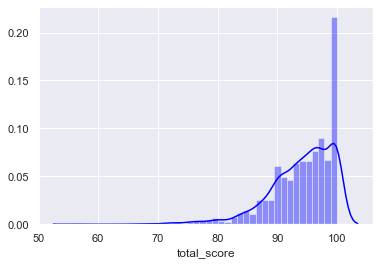

In [371]:
sns.distplot(merged['total_score'], color = 'blue')

In [429]:
#contingency_table['above_92'] = contingency_table['92_to_95'] + contingency_table['96_to_99'] + contingency_table['100']
#contingency_table['above_95'] = contingency_table['96_to_99'] + contingency_table['100']

contingency_table['above_92']
#con_table = contingency_table[contingency_table['above_92'] > .8].reset_index()

0     0.88
1     0.83
2     0.80
3     0.83
4     0.80
5     0.78
6     0.93
7     0.94
8     0.90
9     0.87
10    0.72
11    0.82
12    0.85
13    0.99
14    0.82
15    0.80
16    0.96
17    0.92
18    0.79
19    0.84
20    0.83
21    0.58
22    0.56
23    0.84
24    0.81
25    0.94
26    0.94
27    0.93
28    0.96
29    0.67
30    0.67
31    0.82
32    0.91
33    0.72
34    0.93
35    0.83
36    0.95
37    0.84
Name: above_92, dtype: float64

0.88
0.8300000000000001
0.8300000000000001
0.9299999999999999
0.9400000000000001
0.8999999999999999
0.87
0.8200000000000001
0.8500000000000001
0.99
0.82
0.96
0.92
0.84
0.83
0.8400000000000001
0.81
0.94
0.94
0.9299999999999999
0.96
0.8200000000000001
0.9099999999999999
0.93
0.8300000000000001
0.95
0.8400000000000001


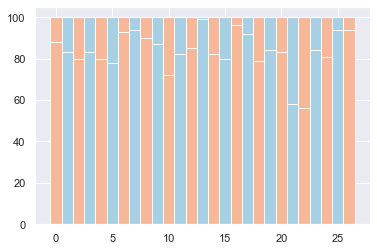

In [424]:
#sns.barplot(data = contingency_table, x = '96_to_99', y = 'Inspector')

#colors = ['darkgreen', 'green','mediumseagreen','g']
#print(con_table['above_92'])
#for i in range(len(yy)):
for i in range(len(con_table['Inspector'])):
    ins = con_table['Inspector'][i]
    #new_df = health[health['Inspector'] == ins]
    print(con_table['above_92'][i])
    try:
        bar = [100, (contingency_table['above_92'][i] * 100)]
        plt.bar(i, bar, edgecolor='white', width=1)
    except:
        pass
plt.show()

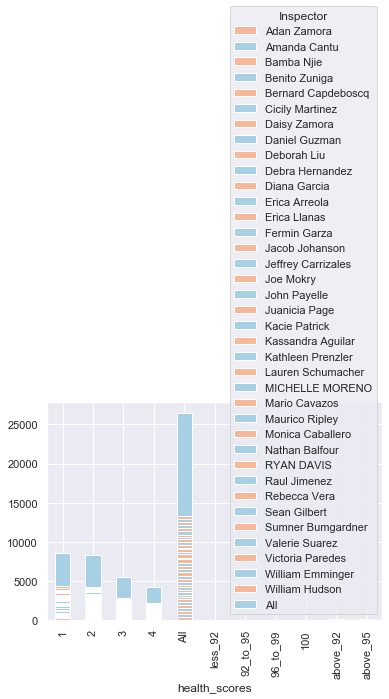

In [455]:
contingency_table.set_index('Inspector').T.plot(kind='bar', stacked=True)
